
# Load Data 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from keras.utils import np_utils
import keras 



X_train = np.load('data/X_train.npy')
X_test = np.load('data/X_test.npy')
y_train = np.load('data/y_train.npy')
y_test = np.load('data/y_test.npy')
max_length = int(np.load('data/max.npy'))

/home/rommeltf/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
if len(set(y_train)) == 2:
    num_classes = 2
    activation = 'sigmoid'
    loss = keras.losses.binary_crossentropy
    output = 1
    classes = ['no', 'yes']
else:
    num_classes = 10
    y_train = np_utils.to_categorical(y_train, num_classes)
    y_test = np_utils.to_categorical(y_test, num_classes)
    activation = 'softmax'
    loss = keras.losses.categorical_crossentropy
    output = 10


In [3]:
X_train.shape

(557, 1020, 3)

In [4]:
y_train.shape

(557,)

In [5]:
X_test.shape

(62, 1020, 3)

In [6]:
X_train.shape[1]

1020

In [7]:
import pywt
from scipy import signal

#rng = X_train.shape[1]
rng = 256
scales = range(1, rng + 1)
waveletname = 'mexh'
dt = 0.0512  # 512 Hz sampling
widths = pywt.scale2frequency(waveletname, scales) / dt


def create_plots(sample, color):
    '''
    :param rows: rows from ranges of taget values 
    :param data: data frame to use
    :return: plot of sigals, cwt and target response 
    '''

    plt.figure(figsize=(35,5))

    plt.subplot(1,7,1)
    plt.plot(X_train[sample, :, 0])

    plt.subplot(1,7,2)
    cwtmatr, freq = pywt.cwt(X_train[sample, :, 0], scales, waveletname)
    plt.imshow(cwtmatr, extent=[-1, 1, 1, rng], cmap=color, aspect='auto',
           vmax=abs(cwtmatr).max(), vmin=-abs(cwtmatr).max())

    plt.subplot(1,7,3)
    plt.plot(X_train[sample, :, 1])

    plt.subplot(1,7,4)
    cwtmatr, freq = pywt.cwt(X_train[sample, :, 1], scales, waveletname)
    plt.imshow(cwtmatr, extent=[-1, 1, 1, rng], cmap=color, aspect='auto',
           vmax=abs(cwtmatr).max(), vmin=-abs(cwtmatr).max())
    
    plt.subplot(1,7,5)
    plt.plot(X_train[sample, :, 2])

    plt.subplot(1,7,6)
    cwtmatr, freq = pywt.cwt(X_train[sample, :, 2], scales, waveletname)
    plt.imshow(cwtmatr, extent=[-1, 1, 1, rng], cmap=color, aspect='auto',
           vmax=abs(cwtmatr).max(), vmin=-abs(cwtmatr).max())
    
    
    plt.subplot(1,7,7)
    plt.text(0.35, 0.5, y_train[sample], dict(size=30))

    plt.show()

In [8]:
def create_plots(sample, color):
    '''
    :param rows: rows from ranges of taget values 
    :param data: data frame to use
    :return: plot of sigals, cwt and target response 
    '''

    plt.figure(figsize=(20,5))

#     plt.subplot(1,3,1)
#     plt.plot(X_train[sample, :, 0])

    plt.subplot(1,3,1)
    cwtmatr, freq = pywt.cwt(X_train[sample, :, 0], scales, waveletname)
    plt.imshow(cwtmatr, extent=[-1, 1, 1, rng], cmap=color, aspect='auto',
           vmax=abs(cwtmatr).max(), vmin=-abs(cwtmatr).max())

#     plt.subplot(1,3,2)
#     plt.plot(X_train[sample, :, 1])

    plt.subplot(1,3,2)
    cwtmatr, freq = pywt.cwt(X_train[sample, :, 1], scales, waveletname)
    plt.imshow(cwtmatr, extent=[-1, 1, 1, rng], cmap=color, aspect='auto',
           vmax=abs(cwtmatr).max(), vmin=-abs(cwtmatr).max())
    
#     plt.subplot(1,3,3)
#     plt.plot(X_train[sample, :, 2])

    plt.subplot(1,3,3)
    cwtmatr, freq = pywt.cwt(X_train[sample, :, 2], scales, waveletname)
    plt.imshow(cwtmatr, extent=[-1, 1, 1, rng], cmap=color, aspect='auto',
           vmax=abs(cwtmatr).max(), vmin=-abs(cwtmatr).max())
    
    
#     plt.subplot(1,7,7)
#     plt.text(0.35, 0.5, y_train[sample], dict(size=30))

    plt.show()

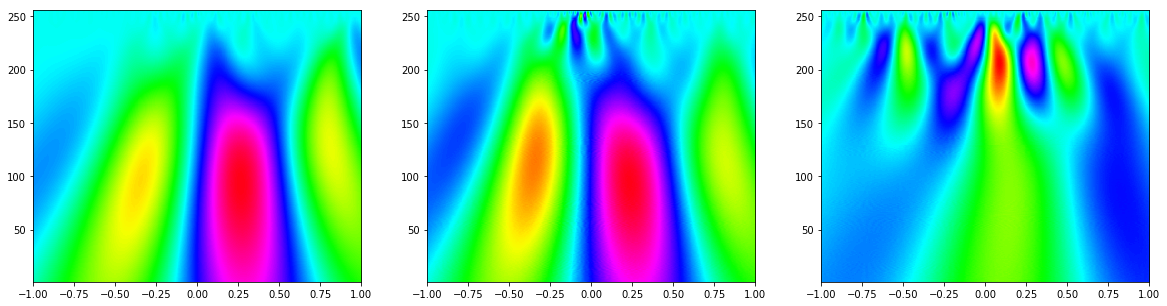

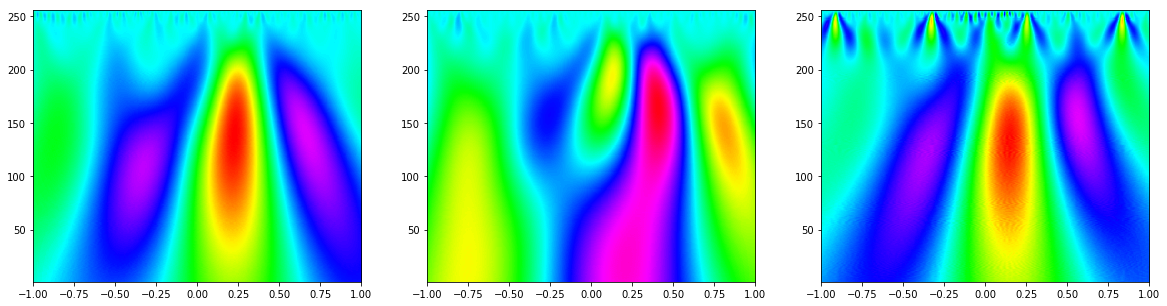

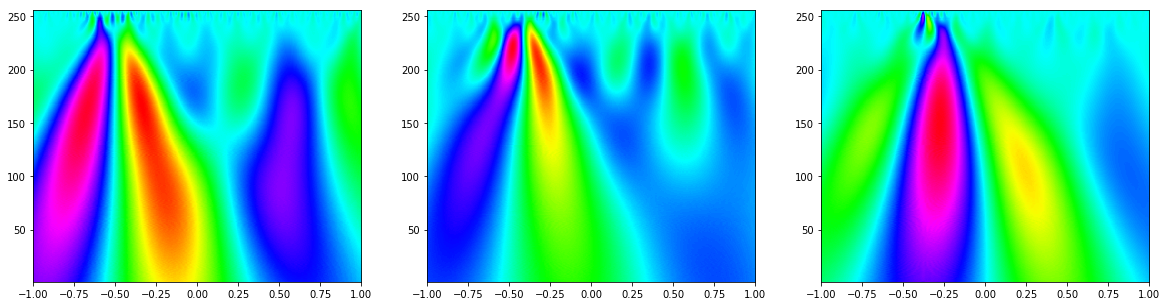

In [9]:
for i in [21,22,23]:
    create_plots(i,'hsv')

# Generate CWT transformations 

In [10]:
import pywt 

train_size = X_train.shape[0]
test_size= X_test.shape[0]


train_data_cwt = np.ndarray(shape=(train_size, rng, rng, 3))

for i in range(0,train_size):
    for j in range(0,3):
        signal = X_train[i, :, j]
        coeff, freq = pywt.cwt(signal, scales, waveletname, 1)
        coeff_ = coeff[:,:rng]
        train_data_cwt[i, :, :, j] = coeff_

test_data_cwt = np.ndarray(shape=(test_size, rng, rng, 3))

for i in range(0,test_size):
    for j in range(0,3):
        signal = X_test[i, :, j]
        coeff, freq = pywt.cwt(signal, scales, waveletname, 1)
        coeff_ = coeff[:,:rng]
        test_data_cwt[i, :, :, j] = coeff_


X_train = train_data_cwt
X_test = test_data_cwt

np.save('X_train', X_train)
np.save('X_test', X_test)

In [44]:
# After CWT transformations 

X_test = np.load('X_test.npy')
X_train = np.load('X_train.npy')

In [45]:
X_train.shape

(557, 256, 256, 3)

In [46]:
y_train.shape[-1]

557

In [47]:
X_test.shape

(62, 256, 256, 3)

In [48]:
y_test.shape

(62,)

In [49]:
y_test

array([0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1])

# Model with CWT-CNN 

In [50]:
import keras
from keras.layers import Dense, Flatten, Dropout
from keras.layers import Conv2D, MaxPooling2D
from keras.models import Sequential
from keras.callbacks import History, EarlyStopping
history = History()

img_x = X_train.shape[1]
img_y = X_train.shape[1]
img_z = X_train.shape[-1]
input_shape = (img_x, img_y, img_z)

batch_size = 16
epochs = 25

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')


model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), strides=(1, 1),
                 activation='relu',
                 input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.50))
model.add(Dense(output, activation=activation))

model.compile(loss=loss,
              optimizer=keras.optimizers.Adam(lr = 0.0001),
              metrics=['accuracy'])


model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, y_test),
          callbacks=[history, EarlyStopping(monitor='val_loss', patience=10)])

train_score = model.evaluate(X_train, y_train, verbose=0)
print('Train loss: {}, Train accuracy: {}'.format(train_score[0], train_score[1]))
test_score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss: {}, Test accuracy: {}'.format(test_score[0], test_score[1]))

Train on 557 samples, validate on 62 samples
Epoch 1/25
557/557 [==============================] - 16s 28ms/step - loss: 1.1243 - acc: 0.6032 - val_loss: 0.7397 - val_acc: 0.5323
Epoch 2/25
557/557 [==============================] - 8s 14ms/step - loss: 0.7917 - acc: 0.6481 - val_loss: 0.5339 - val_acc: 0.6774
Epoch 3/25
557/557 [==============================] - 8s 14ms/step - loss: 0.6745 - acc: 0.7074 - val_loss: 0.5081 - val_acc: 0.7581
Epoch 4/25
557/557 [==============================] - 8s 14ms/step - loss: 0.5900 - acc: 0.7433 - val_loss: 0.5289 - val_acc: 0.6935
Epoch 5/25
557/557 [==============================] - 8s 14ms/step - loss: 0.5150 - acc: 0.8043 - val_loss: 0.4648 - val_acc: 0.7581
Epoch 6/25
557/557 [==============================] - 8s 14ms/step - loss: 0.5097 - acc: 0.7989 - val_loss: 0.4928 - val_acc: 0.7581
Epoch 7/25
557/557 [==============================] - 8s 14ms/step - loss: 0.4746 - acc: 0.8115 - val_loss: 0.4717 - val_acc: 0.7419
Epoch 8/25
557/557 [===

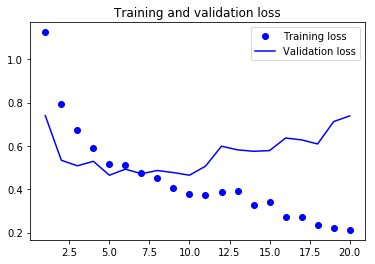

In [51]:
### Plot Losss
def plot_loss():
    acc = history.history['acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)
    plt.figure()
    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()
    plt.show()

plot_loss()

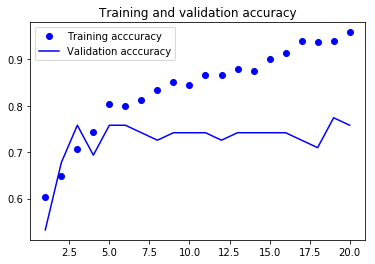

In [52]:
### Plot accuracy 

def plot_accuracy():
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    epochs = range(1, len(acc) + 1)
    plt.figure()
    plt.plot(epochs, acc, 'bo', label='Training acccuracy')
    plt.plot(epochs, val_acc, 'b', label='Validation acccuracy')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.show()
    
plot_accuracy()

In [53]:
#Testing Scores 
from sklearn.metrics import classification_report
import numpy as np

if y_train.shape[-1] == 10:
    y_test = np.argmax(y_test, axis=1) # Convert one-hot to index
y_pred = model.predict_classes(X_test)
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.75      0.72      0.74        29
          1       0.76      0.79      0.78        33

avg / total       0.76      0.76      0.76        62



In [54]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)

array([[21,  8],
       [ 7, 26]])

In [55]:
if y_train.shape[-1] == 10:
    y_test = np.argmax(y_test, axis=1) # Convert one-hot to index
y_pred = model.predict_classes(X_train)
print(classification_report(y_train, y_pred))

             precision    recall  f1-score   support

          0       0.97      0.95      0.96       283
          1       0.95      0.97      0.96       274

avg / total       0.96      0.96      0.96       557



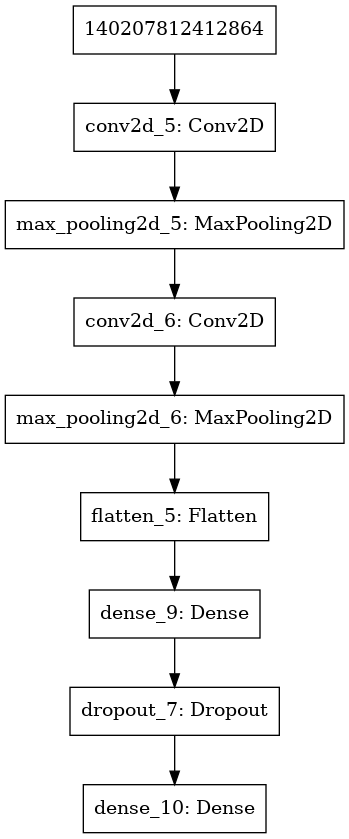

In [56]:
import pydot
from IPython.display import Image
from keras.utils import plot_model
plot_model(model, to_file='lstm.png')
Image(filename='lstm.png') 

# Conv1D 

In [57]:
from keras.layers import Conv1D, MaxPooling1D

X_train = np.load('data/X_train.npy')
X_test = np.load('data/X_test.npy')
#y_train = np.load('data/y_train.npy')
#y_test = np.load('data/y_test.npy')
max_length = int(np.load('data/max.npy'))


img_y = X_train.shape[1]
img_z = X_train.shape[-1]

input_shape = (img_y, img_z)

batch_size = 16
epochs = 25

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')


model = Sequential()
model.add(Conv1D(400, kernel_size=3, strides=1,
                 activation='relu',
                 input_shape=input_shape))
model.add(Dropout(0.25))
model.add(MaxPooling1D(pool_size=2, strides=2))
model.add(Conv1D(400, 3, activation='relu'))
model.add(Dropout(0.25))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(200, activation='relu'))
model.add(Dense(output, activation=activation))

model.compile(loss=loss,
              optimizer=keras.optimizers.Adam(lr = 0.0001),
              metrics=['accuracy'])


model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, y_test),
          callbacks=[history, EarlyStopping(monitor='val_loss', patience=5)])

train_score = model.evaluate(X_train, y_train, verbose=0)
print('Train loss: {}, Train accuracy: {}'.format(train_score[0], train_score[1]))
test_score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss: {}, Test accuracy: {}'.format(test_score[0], test_score[1]))

Train on 557 samples, validate on 62 samples
Epoch 1/25
557/557 [==============================] - 4s 8ms/step - loss: 0.7018 - acc: 0.6194 - val_loss: 0.5913 - val_acc: 0.6613
Epoch 2/25
557/557 [==============================] - 2s 4ms/step - loss: 0.5736 - acc: 0.7217 - val_loss: 0.5275 - val_acc: 0.7258
Epoch 3/25
557/557 [==============================] - 2s 4ms/step - loss: 0.4949 - acc: 0.7522 - val_loss: 0.5103 - val_acc: 0.7419
Epoch 4/25
557/557 [==============================] - 2s 4ms/step - loss: 0.4620 - acc: 0.7917 - val_loss: 0.4916 - val_acc: 0.7097
Epoch 5/25
557/557 [==============================] - 2s 4ms/step - loss: 0.4403 - acc: 0.8205 - val_loss: 0.4614 - val_acc: 0.7419
Epoch 6/25
557/557 [==============================] - 2s 4ms/step - loss: 0.4387 - acc: 0.8276 - val_loss: 0.4373 - val_acc: 0.7742
Epoch 7/25
557/557 [==============================] - 2s 4ms/step - loss: 0.3991 - acc: 0.8528 - val_loss: 0.4251 - val_acc: 0.7581
Epoch 8/25
557/557 [===========

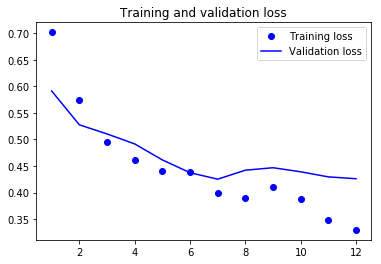

In [58]:
plot_loss()

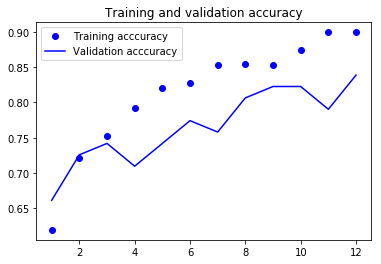

In [59]:
plot_accuracy()

In [60]:
if y_train.shape[-1] == 10:
    y_test = np.argmax(y_test, axis=1) # Convert one-hot to index
y_pred = model.predict_classes(X_test)
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.85      0.79      0.82        29
          1       0.83      0.88      0.85        33

avg / total       0.84      0.84      0.84        62



In [61]:
confusion_matrix(y_test, y_pred)

array([[23,  6],
       [ 4, 29]])

In [62]:
if y_train.shape[-1] == 10:
    y_test = np.argmax(y_test, axis=1) # Convert one-hot to index
y_pred = model.predict_classes(X_train)
print(classification_report(y_train, y_pred))

             precision    recall  f1-score   support

          0       0.96      0.87      0.91       283
          1       0.87      0.96      0.91       274

avg / total       0.92      0.91      0.91       557



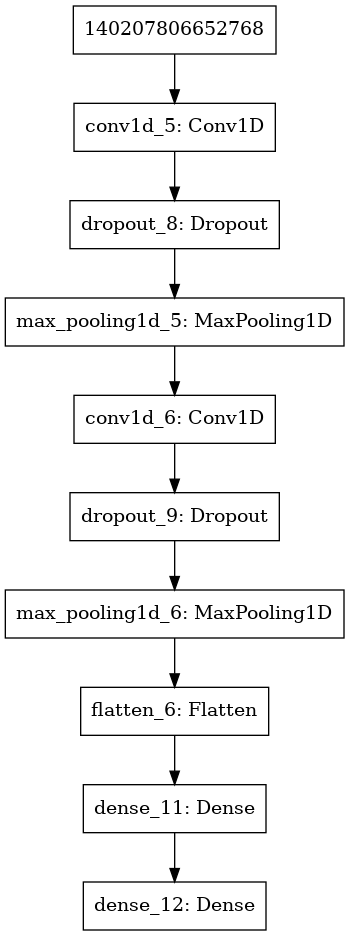

In [63]:
plot_model(model, to_file='lstm.png')
Image(filename='lstm.png') 